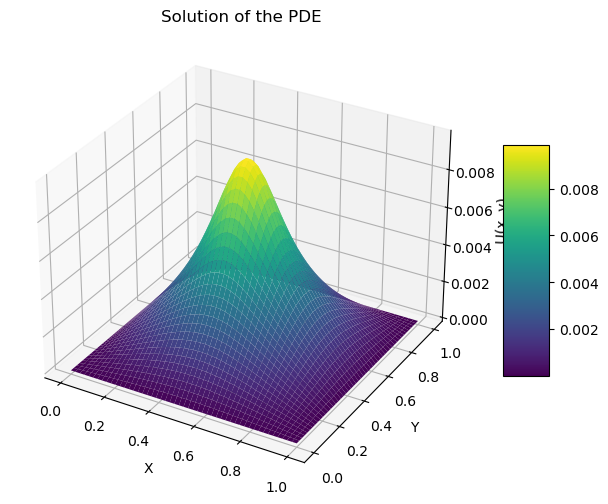

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
alpha = 100.0  # Given alpha
n = 50  # Number of grid points per dimension (including boundary)
L = 1.0  # Length of the domain in each dimension
h = L / (n - 1)  # Grid spacing

# Grid
x = np.linspace(0, L, n)
y = np.linspace(0, L, n)
X, Y = np.meshgrid(x, y)

# Initialize the source term (RHS of the PDE)
rhs = np.exp(-alpha * ((X - 0.5)**2 + (Y - 0.5)**2))

# Initialize solution array with boundary conditions
u = np.zeros((n, n))

# Adjust RHS for boundary conditions
rhs[0, :] = rhs[-1, :] = rhs[:, 0] = rhs[:, -1] = 0

# Construct the finite difference matrix A and vector b
A = np.zeros((n**2, n**2))
b = np.zeros(n**2)

for j in range(n):
    for i in range(n):
        idx = j * n + i
        # Adjust for boundary points
        if i == 0 or i == n-1 or j == 0 or j == n-1:
            A[idx, idx] = 1  # Diagonal = 1 for boundaries
            b[idx] = 0  # Boundary condition is u = 0
        else:
            # Setup the Laplacian operator in A
            A[idx, idx] = -4 / h**2
            if i > 0: A[idx, idx - 1] = 1 / h**2  # Left neighbor
            if i < n-1: A[idx, idx + 1] = 1 / h**2  # Right neighbor
            if j > 0: A[idx, idx - n] = 1 / h**2  # Bottom neighbor
            if j < n-1: A[idx, idx + n] = 1 / h**2  # Top neighbor
            b[idx] = rhs[j, i]

# Solve the linear system
u_flat = np.linalg.solve(A, b)
u_flat = -1 * u_flat
# Reshape the solution back to 2D for plotting
u = u_flat.reshape((n, n))

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u, cmap='viridis', edgecolor='none')
plt.title('Solution of the PDE')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U(x, y)')
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
